# PIL绘制动图：GIF生成
## 最后的成果
- ```film_gray.png```作为背景的倒计时动画

![filmstart](filmstart.gif)

这是背景原图：

![lenna_gray](film_gray.png)

## 制作动画的算法过程
- 加载背景底图；
- 倒计时的数字循环5～1
  - 给扇形的开始角度固定，结束角度从-90到270循环
    - 每次循环绘制一帧加入列表
- 对每一帧进行随机的抖动和模糊
- 将所有帧合成为GIF保存文件

### 加载背景底图

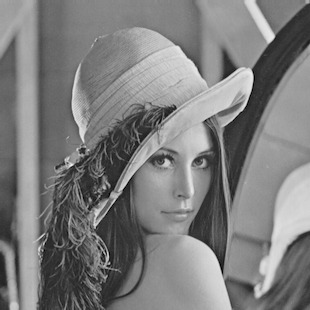

In [2]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from random import randint

im = Image.open("film_gray.png")
w, h = im.size  # 宽和高
im

### 定义绘制一帧画面的函数

In [3]:
# 绘制一帧画面
def drawframe(pie_end, digit):  # end=-90~270, digit=5~1
    frame = im.copy()
    draw = ImageDraw.Draw(frame)
    draw.font = ImageFont.truetype("Baskerville.ttc", 196)
    draw.fontmode = "L"
    df = draw.font.getbbox(digit)  # 渲染数字的外包围盒参数
    # 画十字和圆
    draw.arc([(40, 40), (w - 40, h - 40)], start=0, end=360, fill=200, width=7)
    draw.pieslice(
        [(60, 60), (w - 60, h - 60)],  # 扇形的外包围盒子
        start=270,  # 开始角度
        end=pie_end,  # 结束角度
        fill=0,  # 填充颜色
        outline=220,  # 边框颜色
        width=1,  # 边框厚度
    )
    draw.line([(w // 2, 0), (w // 2, h)], fill=180, width=3)
    draw.line([(0, h // 2), (w, h // 2)], fill=180, width=3)
    draw.text(((w - df[2] - df[0]) // 2, (h - df[3] - df[1]) // 2), digit, fill=255)
    return frame

### 循环绘制每一帧

In [4]:
# 绘制每帧
images = []
for i in range(5, 0, -1):  # 5倒计时到1
    for e in range(-90, 271, 30):  # 画扇形的结束角度
        images.append(drawframe(e, str(i)))

### 对每帧进行随机抖动和模糊

In [5]:
# 随机抖动和模糊
for i, frame in enumerate(images):
    # 裁剪为300*300
    if randint(0, 5) == 0:
        x, y = randint(4, 6), randint(4, 6)
        images[i] = frame.crop((x, y, x + w - 10, y + h - 10))
        images[i] = images[i].filter(ImageFilter.GaussianBlur(radius=5))
    else:
        images[i] = frame.crop((5, 5, w - 5, h - 5))

### 保存动图GIF文件

In [6]:
# 保存动画GIF
images[0].save(
    "filmstart.gif",
    "GIF",
    loop=0,
    save_all=True,
    append_images=images,
    duration=50,  # 每帧持续毫秒，fps=1000/duration
)

## 看看结果

In [7]:
from IPython.display import Image
Image(url="filmstart.gif")